In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
import numpy as np
# Scalers
from sklearn.preprocessing import StandardScaler
# Clustering
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [2]:
df = pd.read_excel('./WonderfulWinesoftheWorld.xlsx', index_col=0)

In [3]:
agedf = df.groupby(['Age']).count()

In [4]:
df.drop(df.tail(1).index,inplace=True)

In [5]:
agedf

,Dayswus,Edu,Income,Freq,Recency,Monetary,LTV,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit
Age,,,,,,,,,,,,,,,,
18.0,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90
19.0,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169
20.0,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175
21.0,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176
22.0,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74.0,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171
75.0,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150
76.0,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156


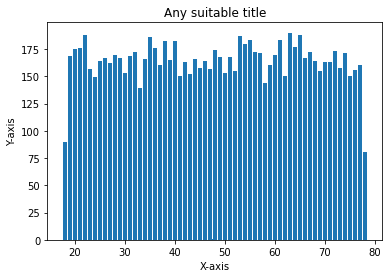

In [6]:
plt.bar(agedf.index, agedf['Dayswus'])
plt.xlabel("X-axis")  # add X-axis label
plt.ylabel("Y-axis")  # add Y-axis label
plt.title("Any suitable title")  # add title
plt.show()

In [7]:
customer_features = ['Dayswus', 'Age', 'Edu', 'Income', 'Freq', 'Recency', 'Monetary', 'LTV',
       'Perdeal', 'WebPurchase', 'WebVisit']

product_features = ['Dryred', 'Sweetred', 'Drywh', 'Sweetwh', 'Dessert',
       'Exotic']

In [8]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(1, len(metric_features), figsize=(17, 6))

# Plot data
# Iterate across axes objects and associate each box plot:
for ax, feat in zip(axes.flatten(), metric_features):
    sns.histplot(x=df_clean[feat], hue=df_clean['y'], stat='density', common_norm=False, ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms by Target"
plt.suptitle(title)
plt.subplots_adjust(wspace=0.4)

plt.show()

NameError: name 'metric_features' is not defined

### Average amount of sales by a single purchase

In [9]:
Mon_by_freq = df['Monetary'] / df['Freq']

In [10]:
df['Value_per_Purchase'] = Mon_by_freq

In [11]:
customer_features.append('Value_per_Purchase')

## Scalling

In [12]:
scaled_df = df.copy()
scaler = StandardScaler()
scaled_feat = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_feat, index = df.index, columns=df.columns)
scaled_df.head()

,Dayswus,Age,Edu,Income,Freq,Recency,Monetary,LTV,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit,Value_per_Purchase
Custid,,,,,,,,,,,,,,,,,,
5325.0,-1.210484,0.408783,1.737959,0.310336,0.448837,-0.635556,0.314393,0.808054,-0.910434,0.708547,-0.388309,-0.200368,-0.632564,-0.754827,-0.901419,-0.344266,-0.092948,0.682525
3956.0,0.705730,1.564728,0.672021,1.274232,1.785683,-0.420874,1.899921,1.130004,-1.089673,-0.058957,-0.896817,1.389036,-0.757335,-0.500993,-0.959401,-1.208144,-0.522070,1.422436
3681.0,-1.146281,-1.729716,-2.525794,-1.518257,-0.888008,-0.091695,-0.901797,-0.740042,1.993239,-1.977717,2.789865,-1.154011,3.110566,1.783517,1.823723,0.951551,1.194418,-1.618653
2829.0,0.745239,-0.342582,-0.393917,-0.295404,-1.055114,-0.234816,-0.904887,-0.736617,1.347978,1.518690,-0.769690,-1.392422,-0.757335,-0.754827,2.229595,0.897558,0.765296,-0.980450
8788.0,-0.301764,-0.053595,-0.393917,-0.149049,-1.055114,-0.850238,-0.906433,-0.702367,0.093305,1.476051,-0.896817,-1.312952,-0.632564,-0.754827,0.664088,1.113528,0.336174,-1.016918


# Product Features

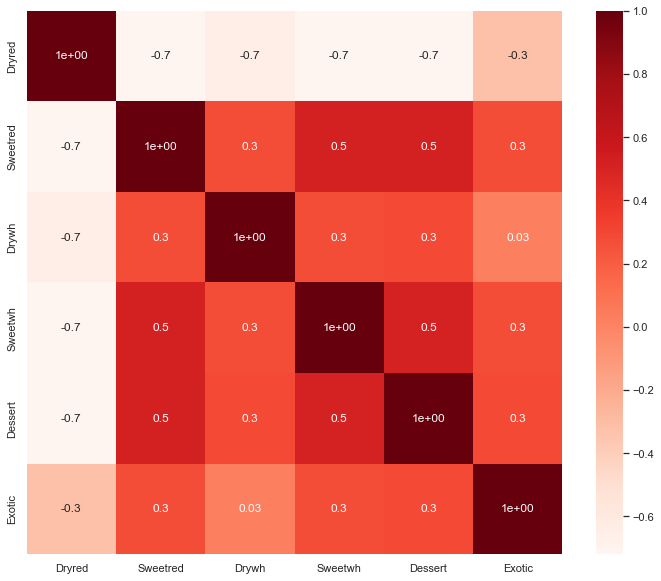

In [13]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(scaled_df[product_features].corr(method="spearman"), decimals=2)


cor_heatmap(corr)

__Who buys Dry red wines doesn't buy any other types of wine, except Exotic ones__

In [14]:
def kMeansRes(scaled_data, k, alpha_k=0.02):
    '''
    Parameters 
    ----------
    scaled_data: matrix 
        scaled data. rows are samples and columns are features for clustering
    k: int
        current k for applying KMeans
    alpha_k: float
        manually tuned factor that gives penalty to the number of clusters
    Returns 
    -------
    scaled_inertia: float
        scaled inertia value for current k           
    '''
    
    inertia_o = np.square((scaled_data - scaled_data.mean(axis=0))).sum()
    # fit k-means
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_data)
    scaled_inertia = kmeans.inertia_ / inertia_o + alpha_k * k
    return scaled_inertia

def chooseBestKforKMeans(scaled_data, k_range):
    ans = []
    for k in k_range:
        scaled_inertia = kMeansRes(scaled_data, k)
        ans.append((k, scaled_inertia))
    results = pd.DataFrame(ans, columns = ['k','Scaled Inertia']).set_index('k')
    best_k = results.idxmin()[0]
    return best_k, results

In [ ]:
data_matrix = np.matrix(scaled_df[product_features]).astype(float)

# choose k range
k_range=range(2,20)
# compute adjusted intertia
best_k, results = chooseBestKforKMeans(data_matrix, k_range)

# plot the results
plt.figure(figsize=(7,4))
plt.plot(results,'o')
plt.title('Adjusted Inertia for each K')
plt.xlabel('K')
plt.ylabel('Adjusted Inertia')
plt.xticks(range(2,20,1))

In [ ]:
range_clusters = [2,3,4,5,6,7,8]

for n_clusters in range_clusters: 
    cluster = KMeans(n_clusters=n_clusters)
    cluster_labels = cluster.fit_predict(scaled_df[product_features])
    silhouette_avg = silhouette_score(scaled_df[product_features],cluster_labels)
    print('avg_silho is: '+str(silhouette_avg))

In [15]:
#final cluster solution - KMEANS - Stardard Scaler
kmclust = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
km_labels = kmclust.fit_predict(scaled_df[product_features])

# inserting in the dataset for visualization
scaled_df = pd.concat((scaled_df.reset_index(), pd.Series(km_labels, name='km_product_labels')), axis=1).set_index('Custid')
scaled_df.groupby('km_product_labels').mean()

,Dayswus,Age,Edu,Income,Freq,Recency,Monetary,LTV,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit,Value_per_Purchase
km_product_labels,,,,,,,,,,,,,,,,,,
0,0.014332,0.210905,0.127405,0.199572,0.228489,-0.004292,0.247136,0.270864,-0.124696,-0.308046,-0.209139,0.904527,-0.175179,-0.138177,-0.183253,-0.246271,-0.224860,0.182948
1,0.012466,0.151240,0.420750,0.136186,0.014091,-0.066314,-0.018787,-0.097549,-0.025909,1.013707,-0.577339,-0.813364,-0.566712,-0.569105,-0.286395,0.131294,0.187108,0.122212
2,-0.065357,-0.118488,-0.587507,-0.100797,-0.081095,0.032999,-0.069192,-0.005458,-0.060234,-0.936094,0.963270,0.199032,0.842028,0.653143,0.017546,-0.144034,-0.217307,-0.110260
3,0.021682,-1.314920,-1.242369,-1.235847,-0.824476,0.257654,-0.771879,-0.635147,0.756255,-1.503933,1.511960,-0.301238,1.580604,1.840878,2.047809,0.693630,0.500595,-1.082811


In [17]:
Cluster_count = pd.DataFrame(scaled_df.groupby('km_product_labels').count()['Age'])
Cluster_count.rename(columns={"Age":"Count"},inplace = True)
Cluster_count

,Count
km_product_labels,
0,3432
1,3941
2,1784
3,843


# Customers

## Feature Selection

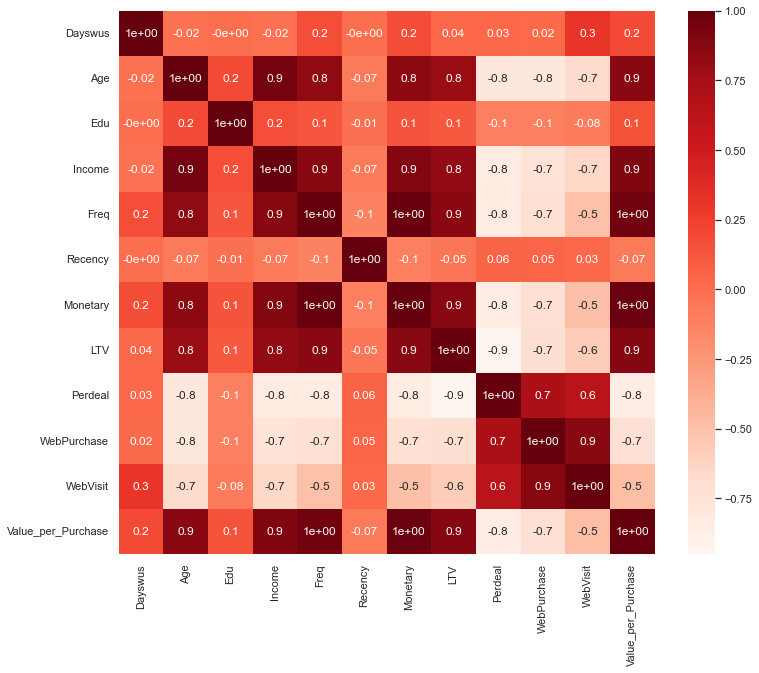

In [18]:
# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(scaled_df[customer_features].corr(method="spearman"), decimals=2)


cor_heatmap(corr)

Age -> Income, perdeal, webp, webv

Income -> Age, Freq, Monetary, LTV, perdeal, webp, webv 

Freq -> Age, Income, Monetary, LTV, perdeal, webp

Perdeal -> Age, Income, Freq, Monetary, LTV, Webp, webv

Webp-> Age, Income, Freq, Monetary, LTV, webv

Webv-> Age, Income, LTV, Webp, webv

In [19]:
Important_Customer_features = ['Age','Edu', 'Freq', 'Recency', 'Monetary', 'LTV',
                    'WebVisit']

## K-means + Hierarchical Clustering

In [20]:
kmclust = KMeans(n_clusters=50, init='k-means++', n_init=15, random_state=1)
km_labels = kmclust.fit_predict(scaled_df[Important_Customer_features])
# create new dataframe: scaled data + labels
scaled_df = pd.concat([scaled_df.reset_index(), pd.Series(km_labels, name='customer_labels_KM')], axis=1).set_index('Custid')
# group by labels to use in hierarchical
df_customer_labels = scaled_df.groupby('customer_labels_KM').mean()

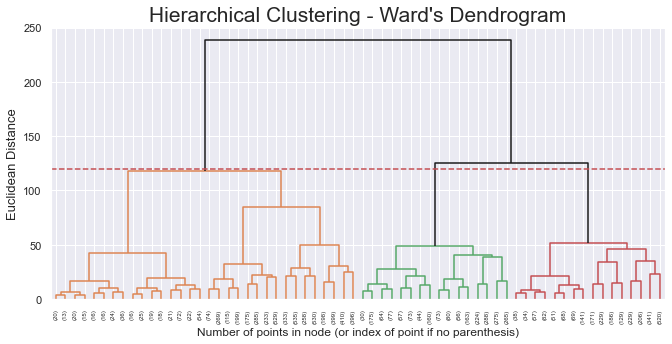

In [21]:
linkage = 'ward' 
distance = 'euclidean'
hclust = AgglomerativeClustering(linkage=linkage, affinity=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(scaled_df[Important_Customer_features])

# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 120
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [22]:
# 3 cluster solution
linkage = 'ward'
distance = 'euclidean'
hc3lust = AgglomerativeClustering(linkage=linkage, affinity=distance, n_clusters=3)
df_customer_labels_HC_KM = hc3lust.fit_predict(scaled_df[Important_Customer_features])

In [23]:
df_customer_labels_HC_KM =pd.DataFrame(df_customer_labels_HC_KM, index=scaled_df.index)

In [30]:
scaled_df['customer_labels_HC_KM'] = df_customer_labels_HC_KM

In [31]:
Cluster_count = pd.DataFrame(scaled_df.groupby('labels_HC_KM').count()['Age'])
Cluster_count.rename(columns={"Age":"Count"},inplace = True)
Cluster_count

,Count
labels_HC_KM,
0,5345
1,2551
2,2104


In [32]:
scaled_df

,Dayswus,Age,Edu,Income,Freq,Recency,Monetary,LTV,Perdeal,Dryred,...,Dessert,Exotic,WebPurchase,WebVisit,Value_per_Purchase,km_product_labels,product_labels_KM,labels_HC_KM,product_labels_HC_KM,customer_labels_HC_KM
Custid,,,,,,,,,,,,,,,,,,,,,
5325.0,-1.210484,0.408783,1.737959,0.310336,0.448837,-0.635556,0.314393,0.808054,-0.910434,0.708547,...,-0.754827,-0.901419,-0.344266,-0.092948,0.682525,1,1,1,1,1
3956.0,0.705730,1.564728,0.672021,1.274232,1.785683,-0.420874,1.899921,1.130004,-1.089673,-0.058957,...,-0.500993,-0.959401,-1.208144,-0.522070,1.422436,0,15,2,2,2
3681.0,-1.146281,-1.729716,-2.525794,-1.518257,-0.888008,-0.091695,-0.901797,-0.740042,1.993239,-1.977717,...,1.783517,1.823723,0.951551,1.194418,-1.618653,3,33,0,0,0
2829.0,0.745239,-0.342582,-0.393917,-0.295404,-1.055114,-0.234816,-0.904887,-0.736617,1.347978,1.518690,...,-0.754827,2.229595,0.897558,0.765296,-0.980450,1,31,0,0,0
8788.0,-0.301764,-0.053595,-0.393917,-0.149049,-1.055114,-0.850238,-0.906433,-0.702367,0.093305,1.476051,...,-0.754827,0.664088,1.113528,0.336174,-1.016918,1,31,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1383.0,1.155151,0.524377,1.737959,0.403053,0.365285,-0.048759,0.237126,-0.075594,-0.372717,1.177577,...,-0.754827,-0.321602,-0.830197,-0.522070,0.649128,1,1,1,1,1
4070.0,-1.491989,1.044553,-0.926887,0.536370,0.281732,-0.249129,0.150586,0.623105,-0.982130,-0.869100,...,0.641262,-0.205638,-1.316129,-1.380314,0.587707,2,38,1,1,1
7909.0,-1.378399,-1.729716,-2.525794,-1.066188,-0.971561,0.037114,-0.889434,-0.698942,-0.336869,-1.892439,...,1.910434,1.417851,0.843566,-0.092948,-1.187106,3,33,0,0,0


## Merge customer and product features

In [34]:
# Count label frequencies (contigency table)
scaled_df.groupby(['customer_labels_HC_KM', 'km_product_labels'])\
    .size()\
    .to_frame()\
    .reset_index()\
    .pivot('customer_labels_HC_KM', 'km_product_labels', 0)

km_product_labels,0,1,2,3
customer_labels_HC_KM,,,,
0,1609,1965,974,797
1,655,1442,424,30
2,1168,534,386,16


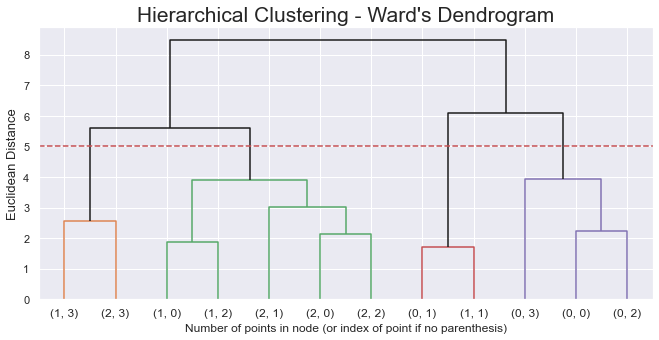

In [36]:
# Centroids of the concatenated cluster labels

df_centroids = scaled_df.groupby(['customer_labels_HC_KM', 'km_product_labels'])\
    [Important_Customer_features+product_features].mean()


# Using Hierarchical clustering to merge the concatenated cluster centroids
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)


hclust_labels = hclust.fit_predict(df_centroids)

# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 5
dendrogram(linkage_matrix, truncate_mode='level', labels=df_centroids.index, p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [37]:
df_centroids

Age       Edu      Freq  \
customer_labels_HC_KM km_product_labels                                 
0                     0                 -0.791130  0.038354 -0.780049   
                      1                 -0.303550  0.314809 -0.627229   
                      2                 -1.044397 -0.592550 -0.828732   
                      3                 -1.439279 -1.251884 -0.911176   
1                     0                  0.690445  0.098367  0.336456   
                      1                  0.407620  0.497568  0.330809   
                      2                  0.764563 -0.544758  0.267741   
                      3                  0.626486 -1.033480  0.242740   
2                     0                  1.322356  0.266362  1.557272   
                      1                  1.132439  0.603154  1.518752   
                      2                  1.247891 -0.621741  1.422250   
                      3                  1.239618 -1.160061  1.493248   

                                          Recency  Monetary       LTV  \
customer_labels_HC_KM km_product_labels                                 
0                     0                  0.192751 -0.747462 -0.690170   
                      1                  0.034201 -0.634997 -0.643461   
                      2                  0.210755 -0.782600 -0.674524   
                      3                  0.283779 -0.852875 -0.706776   
1                     0                 -0.182899  0.226596  0.113450   
                      1                 -0.169131  0.227518  0.018256   
                      2                 -0.182260  0.166506  0.123379   
                      3                 -0.159916  0.138584  0.073622   
2                     0                 -0.175571  1.628781  1.683031   
                      1                 -0.158539  1.583614  1.598567   
                      2                 -0.179088  1.472060  1.541287   
                      3                 -0.260757  1.555598  1.603937   

                                         WebVisit    Dryred  Sweetred  \
customer_labels_HC_KM km_product_labels                                 
0                     0                  0.656482 -0.292770 -0.241272   
                      1                  0.467422  1.039201 -0.607304   
                      2                  0.509761 -1.028100  1.004083   
                      3                  0.592463 -1.523774  1.545073   
1                     0                 -0.639996 -0.214801 -0.135026   
                      1                  0.060310  1.051434 -0.558723   
                      2                 -0.958276 -0.716243  0.895553   
                      3                 -1.022712 -1.163310  0.997375   
2                     0                 -1.206167 -0.381379 -0.206435   
                      1                 -0.501980  0.818019 -0.517341   
                      2                 -1.238014 -0.945431  0.934668   
                      3                 -1.219393 -1.154249  0.827342   

                                            Drywh   Sweetwh   Dessert  \
customer_labels_HC_KM km_product_labels                                 
0                     0                  0.924661 -0.201720 -0.155816   
                      1                 -0.805717 -0.597641 -0.595551   
                      2                  0.282572  0.913879  0.678920   
                      3                 -0.298883  1.609713  1.833519   
1                     0                  0.603312 -0.107383 -0.075481   
                      1                 -0.918135 -0.544913 -0.557939   
                      2                 -0.086224  0.748745  0.617016   
                      3                 -0.425534  1.193252  1.923126   
2                     0                  1.045709 -0.176637 -0.149037   
                      1                 -0.558580 -0.511765 -0.501944   
                      2                  0.301571  0.763190  0.627781   
                      3     

In [46]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    n_clusters=3
)
hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

df_centroids  # centroid's cluster labels

# Mapper between concatenated clusters and hierarchical clusters
cluster_mapper = df_centroids['hclust_labels'].to_dict()

df_ = scaled_df.copy()

# Mapping the hierarchical clusters on the centroids to the observations


df_['merged_labels'] = df_.apply(
    lambda row: cluster_mapper[
        (row['customer_labels_HC_KM'], row['km_product_labels'])
    ], axis=1
)

# Merged cluster centroids
df_.groupby('merged_labels').mean()[Important_Customer_features+product_features]

#Merge cluster contigency table
# Getting size of each final cluster
df_counts = df_.groupby('merged_labels')\
    .size()\
    .to_frame()

# Getting the product and behavior labels
df_counts = df_counts\
    .rename({v:k for k, v in cluster_mapper.items()})\
    .reset_index()

df_counts['customer_labels_HC_KM'] = df_counts['merged_labels'].apply(lambda x: x[0])
df_counts['km_product_labels'] = df_counts['merged_labels'].apply(lambda x: x[1])
df_counts.pivot('customer_labels_HC_KM', 'km_product_labels', 0)

km_product_labels,1,3
customer_labels_HC_KM,,
0,NaN,3380.0
1,3407.0,NaN
2,NaN,3213.0


In [47]:
scaled_df['merged_labels'] = df_.merged_labels

## Cluster profiling

In [33]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

In [42]:
scaled_df

,Dayswus,Age,Edu,Income,Freq,Recency,Monetary,LTV,Perdeal,Dryred,...,Exotic,WebPurchase,WebVisit,Value_per_Purchase,km_product_labels,product_labels_KM,labels_HC_KM,product_labels_HC_KM,customer_labels_HC_KM,merged_labels
Custid,,,,,,,,,,,,,,,,,,,,,
5325.0,-1.210484,0.408783,1.737959,0.310336,0.448837,-0.635556,0.314393,0.808054,-0.910434,0.708547,...,-0.901419,-0.344266,-0.092948,0.682525,1,1,1,1,1,3
3956.0,0.705730,1.564728,0.672021,1.274232,1.785683,-0.420874,1.899921,1.130004,-1.089673,-0.058957,...,-0.959401,-1.208144,-0.522070,1.422436,0,15,2,2,2,1
3681.0,-1.146281,-1.729716,-2.525794,-1.518257,-0.888008,-0.091695,-0.901797,-0.740042,1.993239,-1.977717,...,1.823723,0.951551,1.194418,-1.618653,3,33,0,0,0,0
2829.0,0.745239,-0.342582,-0.393917,-0.295404,-1.055114,-0.234816,-0.904887,-0.736617,1.347978,1.518690,...,2.229595,0.897558,0.765296,-0.980450,1,31,0,0,0,3
8788.0,-0.301764,-0.053595,-0.393917,-0.149049,-1.055114,-0.850238,-0.906433,-0.702367,0.093305,1.476051,...,0.664088,1.113528,0.336174,-1.016918,1,31,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1383.0,1.155151,0.524377,1.737959,0.403053,0.365285,-0.048759,0.237126,-0.075594,-0.372717,1.177577,...,-0.321602,-0.830197,-0.522070,0.649128,1,1,1,1,1,3
4070.0,-1.491989,1.044553,-0.926887,0.536370,0.281732,-0.249129,0.150586,0.623105,-0.982130,-0.869100,...,-0.205638,-1.316129,-1.380314,0.587707,2,38,1,1,1,1
7909.0,-1.378399,-1.729716,-2.525794,-1.066188,-0.971561,0.037114,-0.889434,-0.698942,-0.336869,-1.892439,...,1.417851,0.843566,-0.092948,-1.187106,3,33,0,0,0,0


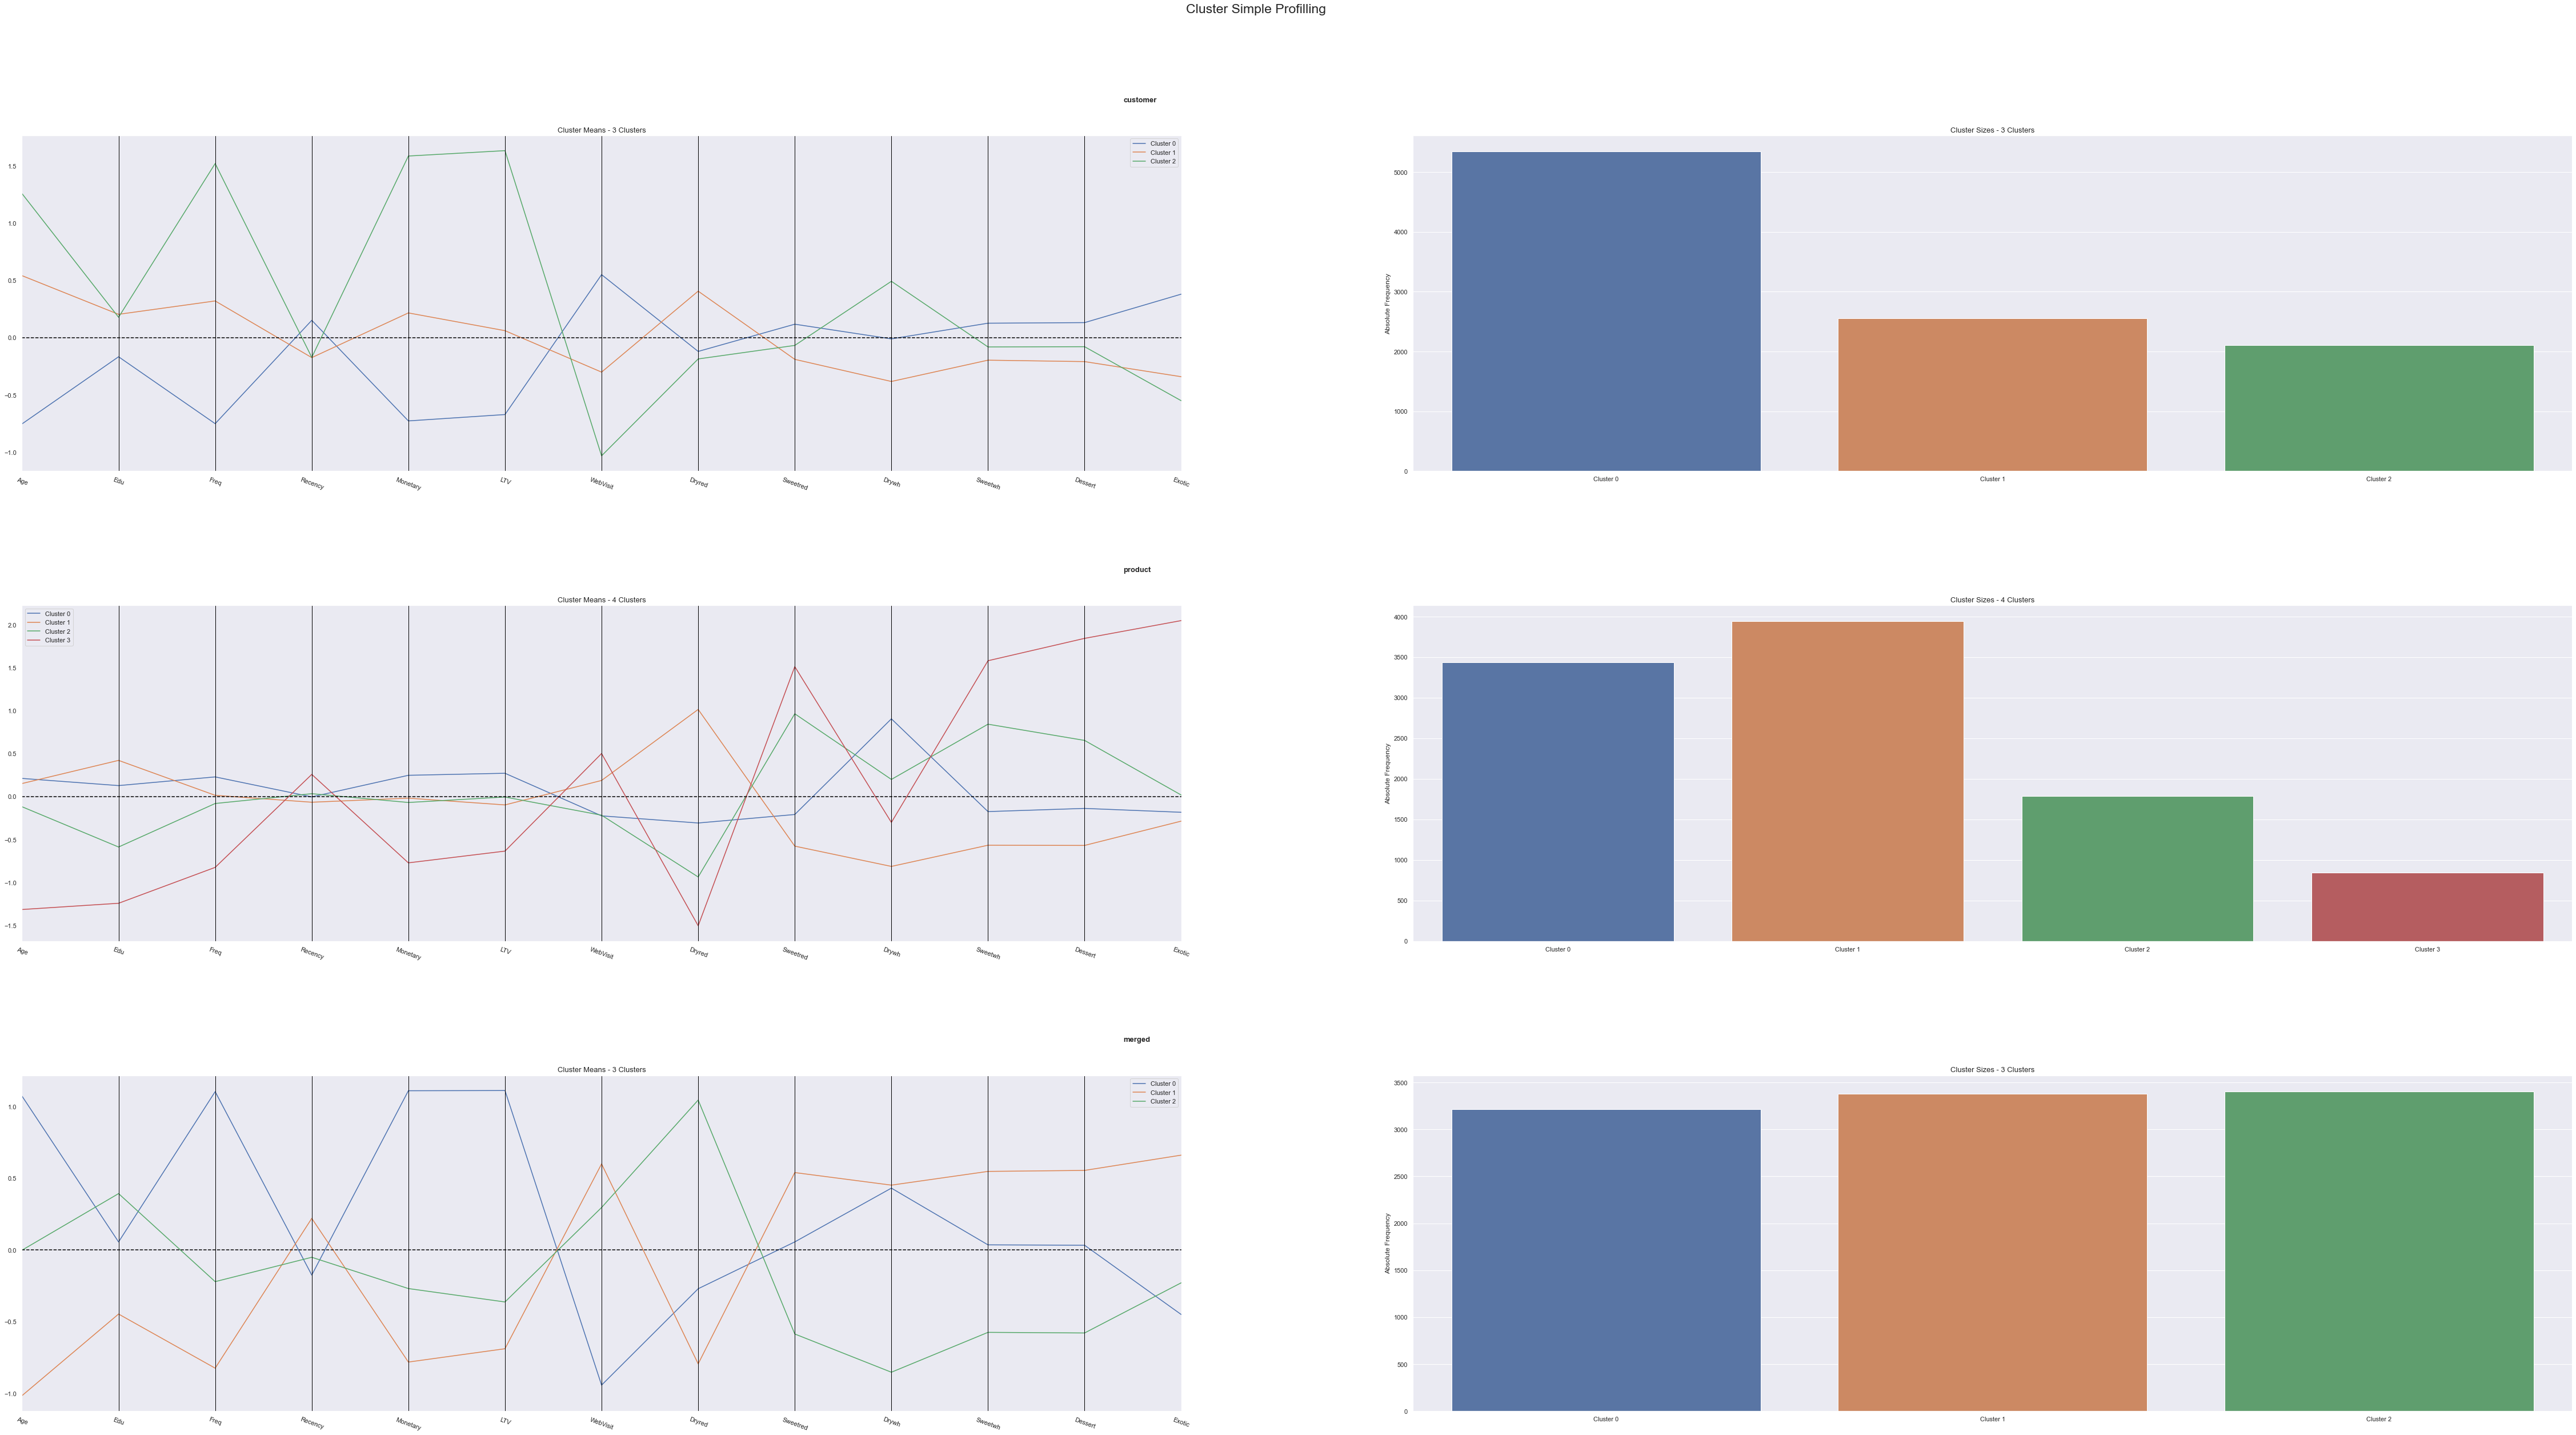

In [48]:
cluster_profiles(
    df = scaled_df[Important_Customer_features+product_features + ['km_product_labels',
                                                                   'customer_labels_HC_KM', 'merged_labels']], 
    label_columns = ['customer_labels_HC_KM','km_product_labels', 'merged_labels'],
    figsize = (80, 40), 
    compar_titles = ["customer", "product", "merged"]
)

In [49]:
two_dim = TSNE(random_state=1).fit_transform(scaled_df[Important_Customer_features+product_features])

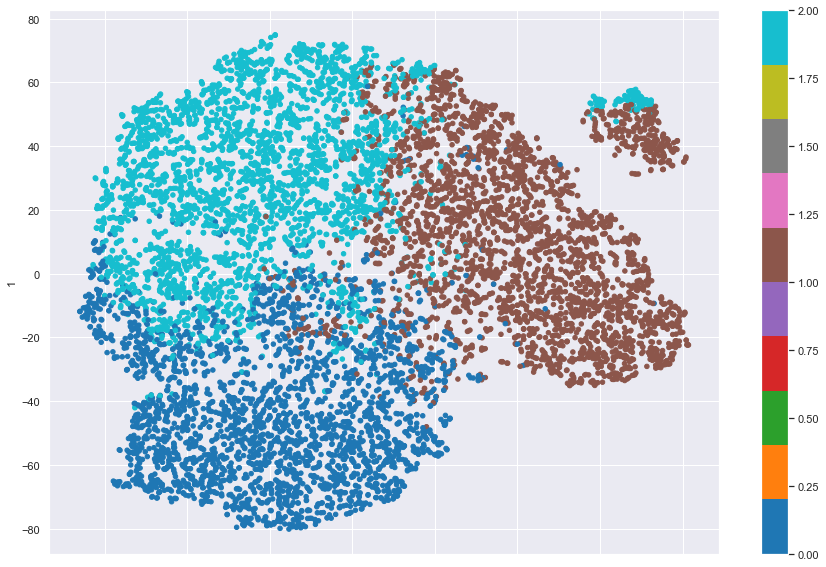

In [50]:
# t-SNE visualization
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=scaled_df['merged_labels'], colormap='tab10', figsize=(15,10))
#plt.savefig('km_tsne.png')
plt.show()